<a href="https://colab.research.google.com/github/HakaniOzdogan/HakaniOzdogan/blob/main/Kargo%20Kutusu%20Tasar%C4%B1m%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# --- 1. AYARLAR VE SINIRLAR ---
# Algoritmanın genel ayarları
POPULATION_SIZE = 50       # Her nesilde kaç birey olacak
GENERATIONS = 100          # Döngü kaç kez dönecek
MUTATION_RATE = 0.1        # Mutasyon ihtimali (%10)
ELITISM_COUNT = 2          # En iyi kaç birey bozulmadan aktarılacak

# Değişkenlerin Sınırları (Senaryo gereği)
X1_BOUNDS = [10, 40]
X2_BOUNDS = [5, 20]

print("✅ Ayarlar yüklendi ve sınırlar belirlendi.")

✅ Ayarlar yüklendi ve sınırlar belirlendi.


In [ ]:
# --- 2. AMAÇ FONKSİYONU VE KISITLAR ---

def calculate_fitness(individual):
    """
    Bireyin başarısını (fitness) hesaplar.
    individual: [x1, x2] listesi
    """
    x1 = individual[0]
    x2 = individual[1]

    # --- KISITLAR (Constraints) ---
    # Kural 1: x1 * x2 <= 600 (Alan sınırı)
    # Kural 2: x1 >= 15 (Alt sınır kısıtı)

    # Eğer kısıtlar sağlanmıyorsa, çok düşük puan vererek (Ceza) elenmesini sağlarız.
    if (x1 * x2 > 600) or (x1 < 15):
        return -9999  # Ceza Puanı (Penalty)

    # --- AMAÇ FONKSİYONU ---
    # Formül: y = x1*x2 - 0.1*x1^2 - 0.1*x2^2
    y = (x1 * x2) - (0.1 * x1**2) - (0.1 * x2**2)
    return y

def create_individual():
    """Rastgele bir birey (kutu ölçüleri) oluşturur."""
    x1 = random.uniform(X1_BOUNDS[0], X1_BOUNDS[1])
    x2 = random.uniform(X2_BOUNDS[0], X2_BOUNDS[1])
    return [x1, x2]

def create_population(size):
    """İlk popülasyonu oluşturur."""
    return [create_individual() for _ in range(size)]

print("✅ Amaç fonksiyonu ve ceza mekanizması hazır.")

✅ Amaç fonksiyonu ve ceza mekanizması hazır.


In [ ]:
# --- 3. GENETİK OPERATÖRLER ---

def selection_tournament(population, fitness_scores, k=3):
    """Turnuva Seçimi: Rastgele k birey seçer, en iyisini alır."""
    # Rastgele 3 aday seç
    selected_indices = random.sample(range(len(population)), k)

    best_candidate = None
    best_score = -float('inf')

    for i in selected_indices:
        if fitness_scores[i] > best_score:
            best_score = fitness_scores[i]
            best_candidate = population[i]

    return best_candidate

def crossover(parent1, parent2):
    """Çaprazlama: İki ebeveynin genlerini karıştırır (Aritmetik Ortalama)."""
    alpha = random.random() # 0 ile 1 arası rastgele oran

    # Çocuk 1
    child1 = [
        alpha * parent1[0] + (1 - alpha) * parent2[0],
        alpha * parent1[1] + (1 - alpha) * parent2[1]
    ]

    # Çocuk 2
    child2 = [
        (1 - alpha) * parent1[0] + alpha * parent2[0],
        (1 - alpha) * parent1[1] + alpha * parent2[1]
    ]
    return child1, child2

def mutate(individual, mutation_rate, bounds_x1, bounds_x2):
    """Mutasyon: Genlerde küçük rastgele değişiklikler yapar."""
    # x1 için mutasyon
    if random.random() < mutation_rate:
        change = random.uniform(-2, 2) # -2 ile +2 cm arası değişim
        individual[0] += change
        # Sınır dışına çıktıysa düzelt (Clamping)
        individual[0] = max(bounds_x1[0], min(individual[0], bounds_x1[1]))

    # x2 için mutasyon
    if random.random() < mutation_rate:
        change = random.uniform(-2, 2)
        individual[1] += change
        individual[1] = max(bounds_x2[0], min(individual[1], bounds_x2[1]))

    return individual

print("✅ Genetik operatörler (Seçim, Çaprazlama, Mutasyon) tanımlandı.")

✅ Genetik operatörler (Seçim, Çaprazlama, Mutasyon) tanımlandı.


In [ ]:
# --- 4. ALGORİTMAYI ÇALIŞTIRMA (MAIN LOOP) ---

# İlk popülasyonu yarat
population = create_population(POPULATION_SIZE)

# Grafik çizmek için verileri tutacağımız listeler
best_fitness_history = []
avg_fitness_history = []

print(f"🚀 Simülasyon Başlıyor... ({GENERATIONS} Nesil)")

for gen in range(GENERATIONS):
    # 1. Tüm bireylerin fitness puanını hesapla
    fitness_scores = [calculate_fitness(ind) for ind in population]

    # En iyi ve ortalama değerleri kaydet
    best_score = max(fitness_scores)
    avg_score = sum(fitness_scores) / len(fitness_scores)

    best_fitness_history.append(best_score)
    avg_fitness_history.append(avg_score)

    # 2. Elitizm: En iyileri koruyup yeni nesle direkt aktar
    # Puanı yüksek olanları başa alacak şekilde sırala
    sorted_pop = [x for _, x in sorted(zip(fitness_scores, population), key=lambda pair: pair[0], reverse=True)]
    new_population = sorted_pop[:ELITISM_COUNT]

    # 3. Yeni bireyler üret
    while len(new_population) < POPULATION_SIZE:
        # Seçim
        p1 = selection_tournament(population, fitness_scores)
        p2 = selection_tournament(population, fitness_scores)

        # Çaprazlama
        c1, c2 = crossover(p1, p2)

        # Mutasyon
        c1 = mutate(c1, MUTATION_RATE, X1_BOUNDS, X2_BOUNDS)
        c2 = mutate(c2, MUTATION_RATE, X1_BOUNDS, X2_BOUNDS)

        new_population.extend([c1, c2])

    # Yeni nesli aktif hale getir
    population = new_population[:POPULATION_SIZE]

    # Her 20 adımda bir ekrana bilgi yaz
    if gen % 20 == 0:
        print(f"Nesil {gen}: En İyi Skor = {best_score:.4f}")

print("🏁 Döngü tamamlandı.")

🚀 Simülasyon Başlıyor... (100 Nesil)
Nesil 0: En İyi Skor = 439.2451
Nesil 20: En İyi Skor = 468.1748
Nesil 40: En İyi Skor = 468.9531
Nesil 60: En İyi Skor = 468.9531
Nesil 80: En İyi Skor = 468.9531
🏁 Döngü tamamlandı.



🏆 OPTİMİZASYON SONUCU
En İyi Genişlik (x1) : 30.27 cm
En İyi Yükseklik (x2): 19.82 cm
Hesaplanan Kâr (y)   : 468.95
Alan Kontrolü (x1*x2): 599.86 cm² (Limit: 600)


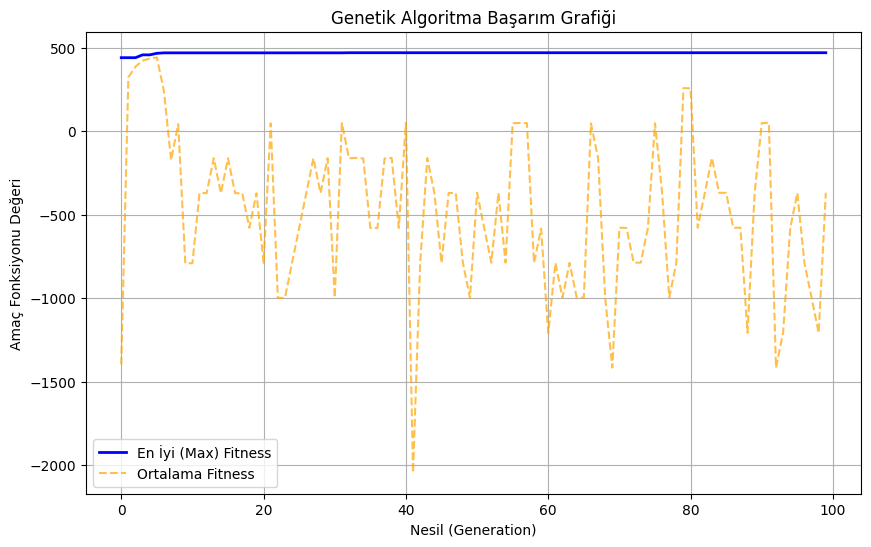

In [ ]:
# --- 5. SONUÇLAR VE GRAFİK ---

# En son popülasyondaki en iyi bireyi bul
final_scores = [calculate_fitness(ind) for ind in population]
best_idx = np.argmax(final_scores)
best_solution = population[best_idx]
best_fitness = final_scores[best_idx]

print("\n" + "="*40)
print("🏆 OPTİMİZASYON SONUCU")
print("="*40)
print(f"En İyi Genişlik (x1) : {best_solution[0]:.2f} cm")
print(f"En İyi Yükseklik (x2): {best_solution[1]:.2f} cm")
print(f"Hesaplanan Kâr (y)   : {best_fitness:.2f}")
print(f"Alan Kontrolü (x1*x2): {best_solution[0]*best_solution[1]:.2f} cm² (Limit: 600)")
print("="*40)

# Grafiği Çiz
plt.figure(figsize=(10, 6))
plt.plot(best_fitness_history, label='En İyi (Max) Fitness', color='blue', linewidth=2)
plt.plot(avg_fitness_history, label='Ortalama Fitness', color='orange', linestyle='--', alpha=0.7)
plt.title('Genetik Algoritma Başarım Grafiği')
plt.xlabel('Nesil (Generation)')
plt.ylabel('Amaç Fonksiyonu Değeri')
plt.legend()
plt.grid(True)
plt.show()